# Introduction to neural network classification

In this notebook, we're going to learn how to write neural networks for classification problems.

A classification problem is when you try to classify something as one thing or another

A few types of classification problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

### Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check out the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little too hard to understand right now. Let's visualize it!

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


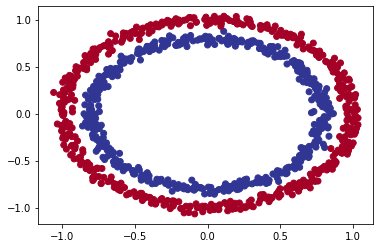

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

🛠️ **Exercise:** Before pushing forward, spend 10 minutes playing around on [TensorFlow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.90446&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) building and running different neural networks. See what happens when you change different hyperparameters.

### Input and output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile a model
3. Fit a model
4. Evaluate a model
5. Tweak a model
6. Evaluate...

In [ ]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.11.0'

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile a model
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)

# Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 5s 3ms/step - loss: 5.7054 - accuracy: 0.4900
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 5.3919 - accuracy: 0.4880
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 7.7205 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 7.7163 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 7.7141 - accuracy: 0.5000


In [ ]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile model
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)

# Fit the model
model_2.fit(X, y, epochs=200, verbose=0)

# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5000


[0.6941680312156677, 0.5]

### Improving our model

I'll try to improve my model by:
* Adding another layers
* Changing optimizer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit a model
model_3.fit(X, y, epochs=200, verbose=0)

In [ ]:
# Let's see how it evaluates
model_3.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.4150


[0.693530797958374, 0.41499999165534973]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features(X), and labels(y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as the line between zones (where each unique class falls).

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by the model predicting on X.
  This function was inspired by two resources:
  1.https://cs231n.github.io/neural-networks-case-study/
  2.https://github.com/madewithml/basics/blob/master/notebooks/
  """
  # Define the axis boundaries of the plot and create a meshgrid.
  X_min, X_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(X_min, X_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to make predictions on these)
  X_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(X_in)

  # Check for whether we're working on multi-class
  if len(y_pred[0]) > 1:
    print("Doing multi-class classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.xlim(yy.min(), yy.max())

313/313 [==============================] - 1s 3ms/step
Doing binary classification


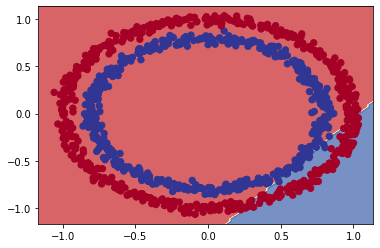

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model_3,
                       X=X,
                       y=y)

In [ ]:
# Let's see if our model can be used for a regression problem...
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X + 100

# Split our regression data into training and test
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

Oh wait... we compiled our model for a binary classification problem, but we're now working on a regression problem. Let's change the model to suit our data.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model
model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

# Fit a model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 7ms/step - loss: 491.4507 - mae: 491.4507
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 417.2924 - mae: 417.2924
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 353.1678 - mae: 353.1678
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 302.9054 - mae: 302.9054
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 273.6470 - mae: 273.6470
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 259.3174 - mae: 259.3174
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 253.2172 - mae: 253.2172
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 253.5214 - mae: 253.5214
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 262.2973 - mae: 262.2973
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 258.6867 - mae: 258.6867
Epoch 11/100
5/5 [=====================

### The missing piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

# Compile a model
model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.1770 - accuracy: 0.4770
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.0306 - accuracy: 0.4760
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.8146 - accuracy: 0.4740
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6291 - accuracy: 0.4740
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6038 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 4.5855 - accuracy: 0.4740
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5684 - accuracy: 0.4730
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 4.5515 - accuracy: 0.4750
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 4.5352 - accuracy: 0.4750
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5092 - accuracy: 0.4740
Epoch 11/

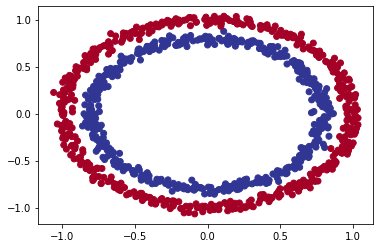

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
Doing binary classification


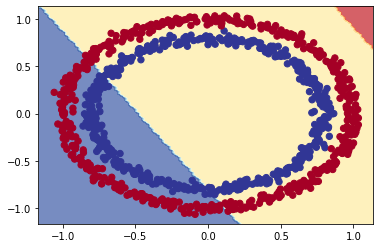

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model_4, X, y)

Let's build first neural network with non-linear activation function.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile a model
model_5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

# Fit the model
history = model_5.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 3s 9ms/step - loss: 2.5878 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 6ms/step - loss: 1.9265 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 5ms/step - loss: 1.5777 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 7ms/step - loss: 1.4095 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 6ms/step - loss: 1.2783 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 6ms/step - loss: 1.1657 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 9ms/step - loss: 1.0696 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 7ms/step - loss: 0.9864 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 7ms/step - loss: 0.9185 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 8ms/step - loss: 0.8624 - accuracy: 0.5000
Epoch 11/

In [ ]:
# Evaluate our model
model_5.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9990


[0.005972337909042835, 0.9990000128746033]

313/313 [==============================] - 1s 2ms/step
Doing binary classification


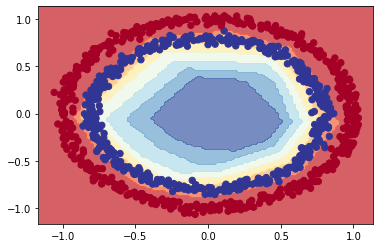

In [ ]:
# How do our model predictions look?
plot_decision_boundary(model_5, X, y)

🧐 **Question:** What's wrong with the predictions we've made? Are we really evaluating our model corretctly? Hint: what data did the model learn on, and what data did we predict on?

🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines). Let's see them in action.

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

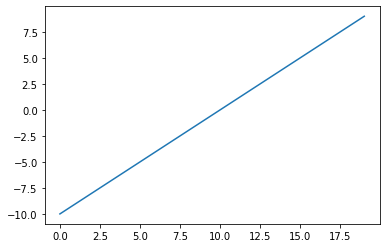

In [ ]:
# Visualize our toy tensor
plt.plot(A);

In [ ]:
# Let's start with replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid_A = sigmoid(A)

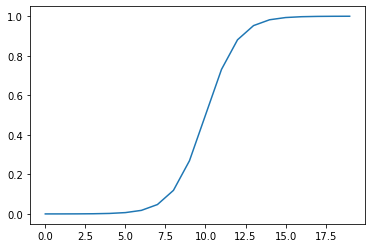

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid_A);

In [ ]:
# Let's recreate relu function
def relu(x):
  return tf.maximum(0, x)

# Use the relu function on our toy tensor
relu_A = relu(A)

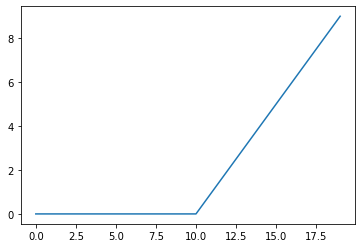

In [ ]:
# Plot our toy tensor transformed by relu
plt.plot(relu_A);

In [ ]:
# Let's try linear function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

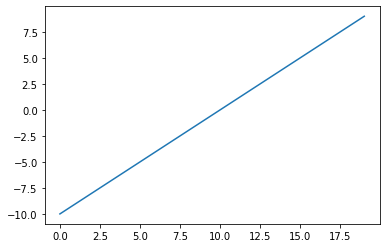

In [ ]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

### Evaluating and improving our classification model

So far we've been training and testing on the same dataset...

However in machine learning this is basically a sin.

So let's create a training and test set.

In [ ]:
# Let's check how many examples we have
len(X)

1000

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Let's recreate our model to fit on the training data and evaluate on testing data

# Set random seed
tf.random.set_seed(42)

# Create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile a model
model_8.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

# Fit a model
history = model_8.fit(X_train, y_train, epochs=300, verbose=0)

In [ ]:
# Let's evaluate our model
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 1.0000


[0.023406626656651497, 1.0]

313/313 [==============================] - 1s 2ms/step
Doing binary classification
313/313 [==============================] - 1s 2ms/step
Doing binary classification


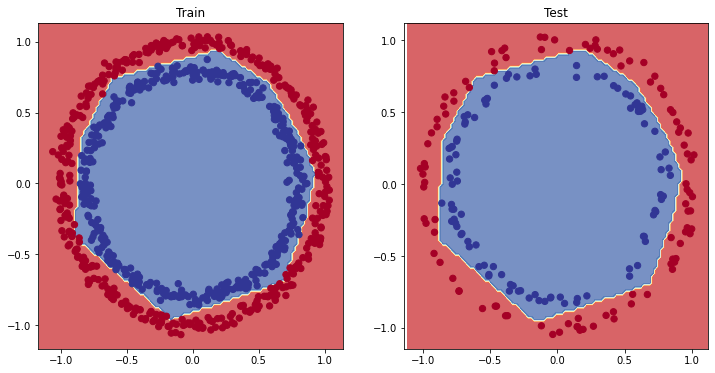

In [ ]:
# Plot the decisions boundary
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)
plt.show();

### Plot the loss (or training) curves

In [ ]:
# Convert the history object into DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.691659,0.50875
1,0.691406,0.51500
2,0.691156,0.51375
3,0.691003,0.51250
4,0.690739,0.51750
...,...,...
295,0.030607,0.99500
296,0.027392,0.99625
297,0.030534,0.99500
298,0.028767,0.99625


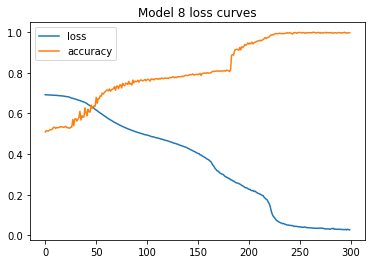

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model 8 loss curves");

🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

### Finding the best learning rate

To find the ideal learning rate, we're going to use the following steps:
* Learning rate **callback**. - you can think of a callback as an extra piece of functionality you can add to your model while it's training.
* Another model (we could use the same one as above, but we're practicing building models)
* A modified loss curves plot.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile a model
model_9.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Creating learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing learning rate scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7013 - accuracy: 0.4938 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.4837 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7008 - accuracy: 0.4850 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7006 - accuracy: 0.4888 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7003 - accuracy: 0.4925 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.4888 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6993 - accuracy: 0.4837 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<AxesSubplot:xlabel='epochs'>

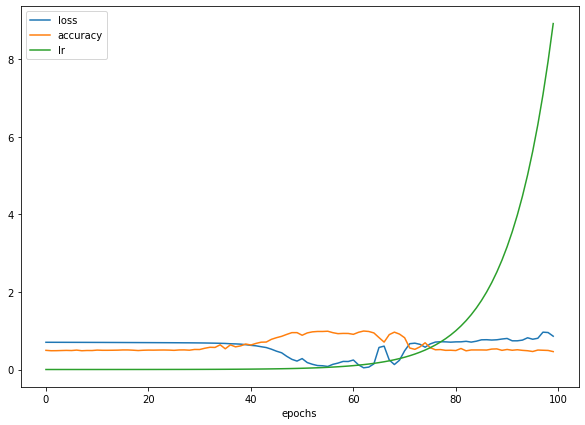

In [ ]:
# Check out the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

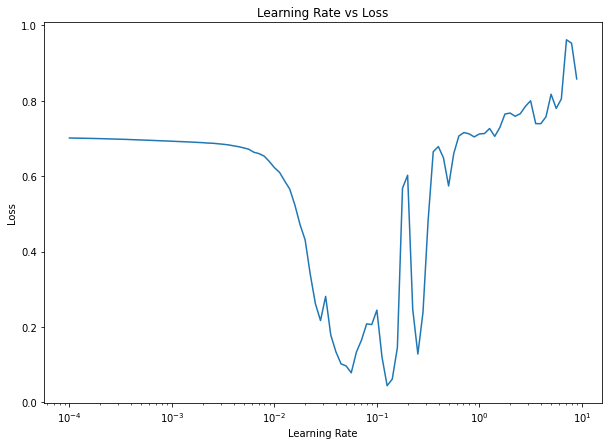

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss");

In [ ]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile a model
model_10.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics = ["accuracy"]
)

# Fit model for 20 epochs
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6948 - accuracy: 0.4550
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5125
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.5238
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6702 - accuracy: 0.5450
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6469 - accuracy: 0.6162
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6051 - accuracy: 0.7300
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5368 - accuracy: 0.7350
Epoch 8/20
25/25 [==============================] - 0s 4ms/step - loss: 0.4660 - accuracy: 0.7887
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4184 - accuracy: 0.8175
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3335 - accuracy: 0.9162
Epoch 11/20
25/25 [

In [ ]:
# Evaluate model_10 on a test dataset
model_10.evaluate(X_train, y_train)

25/25 [==============================] - 0s 3ms/step - loss: 0.1355 - accuracy: 0.9525


[0.13550974428653717, 0.9524999856948853]

313/313 [==============================] - 1s 3ms/step
Doing binary classification
313/313 [==============================] - 1s 2ms/step
Doing binary classification


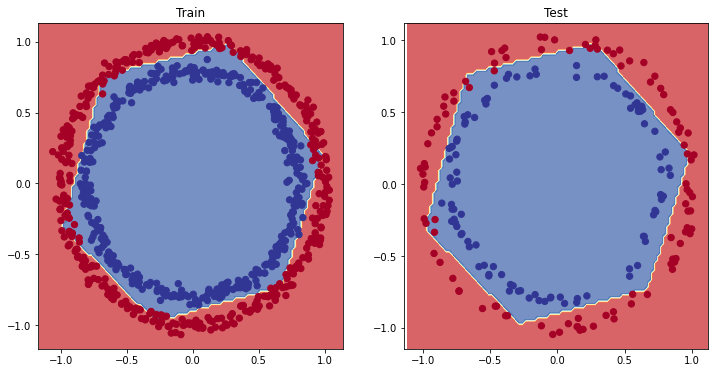

In [ ]:
# Plot the decision boundaries for test and train sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)
plt.show();

### More classification evaluation methods

Alongside vizualizing our model results as much as possible, there are handfull of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from sckit-learn)

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model has loss: {loss}")
print(f"Model has accuracy: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.1342 - accuracy: 0.9500
Model has loss: 0.13415059447288513
Model has accuracy: 95.00%


How about a confucion matrix?

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make some predictions
y_preds = model_10.predict(X_test)

# Create our confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
y_test[:10], y_test.dtype

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]), dtype('int64'))

In [ ]:
y_preds[:10], y_preds.dtype

(array([[0.89546037],
        [0.9922198 ],
        [0.9577225 ],
        [0.9876753 ],
        [0.22706103],
        [0.02204717],
        [0.9448135 ],
        [0.03988703],
        [0.99560684],
        [0.0597561 ]], dtype=float32), dtype('float32'))

Oops... Looks like our predictions array has come out in **prediction probabilty** form.. the standard output from sigmoid (or softmax) activation functions.

In [ ]:
# Convert our prediction probabilities to binary format, and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
confusion_matrix(y_test, tf.round(y_preds))

array([[91, 10],
       [ 0, 99]])

How about we prettify our confusion matrix?

**🔑 Note:** The confusion matrix code we're about to write is a remix of a `sckit.learn`'s plot `confusion_matrix`

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

  # Create a confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes

  else:
    labels = np.arange(cm.shape[0])

  # Label the axis
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=text_size)



# Working with a larger example (multi-class classification)

When you have more than two classes as an option, it's known as **multi-class classification**.

This means if you have three different classes it's multi-class classification. It also means, if you have a hundread different classess, it's also multi-class classification.

**To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.**



In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

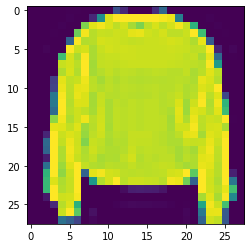

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
# Check out samples label
train_labels[7]

2

In [ ]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Bag')

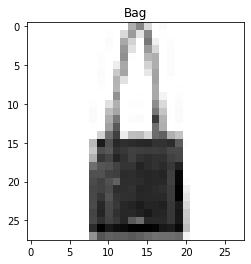

In [ ]:
# Plot an example image and it's label
index = 200
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

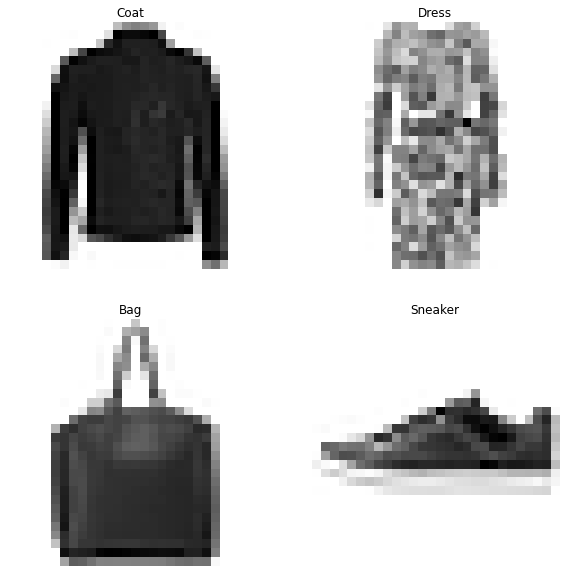

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(10,10))

for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

### Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28x28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are in integer form, use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [ ]:
# Our data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile the model
model_11.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
non_norm_history = model_11.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.4054 - accuracy: 0.0988 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3045 - val_accuracy: 0.0999
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3045 - val_accuracy:

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 4)                 3140      
                                                                 
 dense_26 (Dense)            (None, 4)                 20        
                                                                 
 dense_27 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of a training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns in between 0 and 1.

In [ ]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now our data is normalized. Let's build our model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
norm_history = model_12.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.8531 - accuracy: 0.2609 - val_loss: 1.3388 - val_accuracy: 0.4341
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1404 - accuracy: 0.5331 - val_loss: 1.0376 - val_accuracy: 0.6023
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8983 - accuracy: 0.6820 - val_loss: 0.8492 - val_accuracy: 0.7076
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7859 - accuracy: 0.7288 - val_loss: 0.7745 - val_accuracy: 0.7342
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7348 - accuracy: 0.7437 - val_loss: 0.7457 - val_accuracy: 0.7429
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7010 - accuracy: 0.7503 - val_loss: 0.7264 - val_accuracy: 0.7496
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6790 - accuracy: 0.7563 - val_loss: 0.7224 - val_accuracy:

> 🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 and 1).

<AxesSubplot:title={'center':'Normalized Data'}>

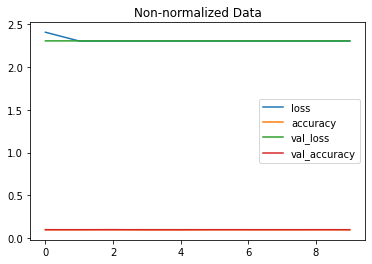

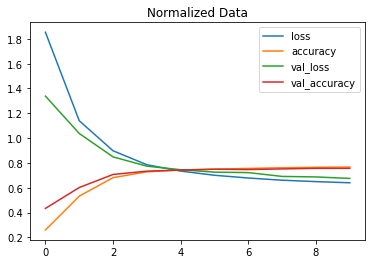

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure, you're comparing them on the same criteria (e.g. same architecture but different data or same data on different architecture).

### Finding the ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile the model
model_13.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                              train_labels,
                              epochs=40,
                              validation_data=(test_data_norm, test_labels),
                              callbacks=(lr_scheduler))

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4520 - accuracy: 0.4269 - val_loss: 1.2081 - val_accuracy: 0.5053 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1013 - accuracy: 0.5309 - val_loss: 1.0691 - val_accuracy: 0.5368 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0091 - accuracy: 0.5510 - val_loss: 1.0063 - val_accuracy: 0.5719 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9391 - accuracy: 0.6068 - val_loss: 0.9124 - val_accuracy: 0.6136 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8642 - accuracy: 0.6360 - val_loss: 0.8627 - val_accuracy: 0.6488 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8280 - accuracy: 0.6488 - val_loss: 0.8719 - val_accuracy: 0.6268 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

Text(0.5, 1.0, 'Finding the ideal learning rate')

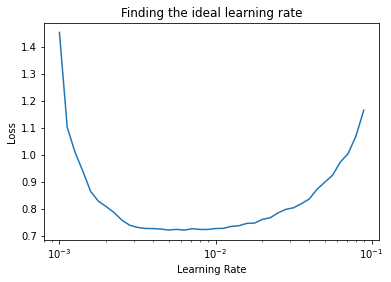

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
# Let's refit a model with a ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create a model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

# Fit the model
model_14.fit(train_data_norm,
             train_labels,
             epochs=40,
             validation_data=(test_data_norm, test_labels))

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3250 - accuracy: 0.5028 - val_loss: 1.0665 - val_accuracy: 0.5749
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9120 - accuracy: 0.6314 - val_loss: 0.8547 - val_accuracy: 0.6592
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8018 - accuracy: 0.6823 - val_loss: 0.8136 - val_accuracy: 0.6813
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7409 - accuracy: 0.7170 - val_loss: 0.7467 - val_accuracy: 0.7252
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6983 - accuracy: 0.7462 - val_loss: 0.7214 - val_accuracy: 0.7637
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6292 - accuracy: 0.7911 - val_loss: 0.6439 - val_accuracy: 0.7790
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5854 - accuracy: 0.8016 - val_loss: 0.6252 - val_accuracy:

### Evaluating our multi-class classification model

To evaluate our model we could:
* Evaluate its performance using other classification metrics
(such as a confusion matrix)
* Assess some of its predictions (through visualization)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top two...



In [ ]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm)

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 3ms/step


array([[5.58787942e-05, 1.46593693e-05, 6.37963531e-05, 8.61420413e-05,
        1.77588515e-06, 4.21716452e-01, 3.89968518e-05, 5.32594323e-02,
        1.20349578e-03, 5.23559332e-01],
       [9.85490740e-04, 3.00769294e-08, 9.76326704e-01, 3.55020688e-08,
        1.20277973e-02, 3.09024272e-20, 9.95898340e-03, 1.26404366e-23,
        7.00890727e-04, 0.00000000e+00],
       [3.63128905e-09, 9.99606669e-01, 2.92483255e-05, 1.79593590e-05,
        6.73210452e-05, 3.26215899e-12, 2.58845319e-08, 2.78786087e-04,
        2.90943766e-12, 6.12903247e-16],
       [8.29192770e-10, 9.99904394e-01, 1.21777327e-06, 6.09222625e-05,
        3.35410587e-05, 1.93058079e-16, 4.12787848e-09, 2.10701989e-09,
        2.79730323e-15, 3.33898589e-19],
       [3.24924558e-01, 2.00845279e-05, 4.77960259e-02, 4.22905907e-02,
        2.35064384e-02, 7.38198969e-09, 5.41910589e-01, 1.49158373e-16,
        1.95516609e-02, 9.39647994e-22]], dtype=float32)

In [ ]:
# Convert all of the prediction probabilities to integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
confusion_matrix(y_true = test_labels, y_pred=y_preds)

array([[802,   2,  18,  60,   5,   3,  87,   1,  22,   0],
       [  1, 947,  14,  22,   6,   0,   1,   6,   2,   1],
       [ 22,   5, 741,  16, 120,   0,  74,   0,  22,   0],
       [ 53,  22,  23, 796,  45,   3,  47,   3,   8,   0],
       [  1,   7, 160,  20, 677,   0, 132,   0,   3,   0],
       [  0,   0,   0,   0,   0, 894,   0,  35,  11,  60],
       [178,   2, 116,  49,  87,   2, 534,   1,  30,   1],
       [  0,   0,   0,   0,   0,  57,   0, 912,   1,  30],
       [  1,   1,  13,   5,   2,  22,  14,   5, 936,   1],
       [  0,   0,   0,   0,   0,  19,   0,  43,   1, 937]])

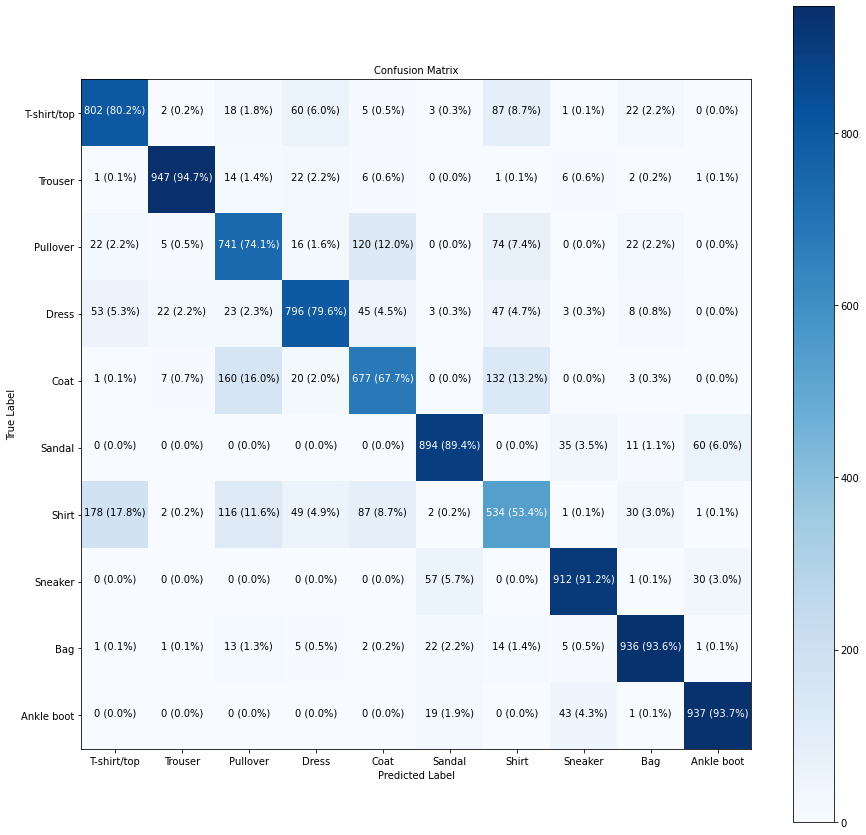

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true = test_labels,
                      y_pred = y_preds,
                      classes = class_names,
                      figsize=(15,15),
                      text_size=10)

> 🔑 **Note:** Often when working with images and other forms of visual data, it's good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a little function for:
* Plot a random image
* Make prediction on said image
* Label the plot with the truth label and the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it, and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color=color)

1/1 [==============================] - 0s 22ms/step


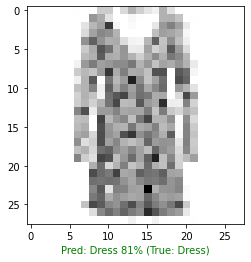

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model_14, test_data_norm, test_labels, class_names)

### What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-1.6601421 ,  1.542806  ,  0.36451364,  1.3611909 ],
        [-0.5314404 ,  1.8920666 , -1.7177463 ,  1.8984245 ],
        [-1.7835253 ,  1.0182176 ,  1.177971  ,  1.4856459 ],
        ...,
        [ 0.10416761, -0.06203362,  0.32430857, -0.09982886],
        [-0.65314174, -0.36962208, -0.66581476,  0.4748757 ],
        [-0.86579704,  1.3182974 ,  0.33283636, -0.40217462]],
       dtype=float32), (784, 4))

Now let's check out the bias vector

In [ ]:
# Bias and biases shapes
biases, biases.shape

(array([0.7354935, 1.4407477, 2.3943737, 1.888489 ], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights metrics.

The bias vector, also gets initialized as zeros (at least in the case of TensorFlow dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.



In [ ]:
model_14.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 4)                 3140      
                                                                 
 dense_35 (Dense)            (None, 4)                 20        
                                                                 
 dense_36 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


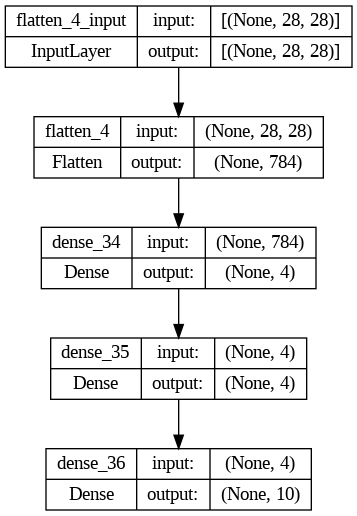

In [ ]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)